In [1]:
import numpy as np
import cv2
import os

In [2]:
path='./digitData/'
xlis=[]
ylis=[]
for i in range(10):
    for fx in os.listdir(path+str(i)):
        if fx.endswith('.png'):
            vpath=path+str(i)
            vpath=vpath+'/'
            dataimg=cv2.imread(vpath+fx)
            dataimg=cv2.cvtColor(dataimg,cv2.COLOR_BGR2GRAY)
            dataimg=cv2.resize(dataimg,(28,28))
            data=np.asarray(dataimg)
            data=data.reshape((28,28,1))
            xlis.append(data)
            ylis.append(i)

In [3]:
features=np.array(xlis)
labels=np.array(ylis)
print(features.shape)
print(labels.shape)

(10181, 28, 28, 1)
(10181,)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2)
xtrain.shape,xtest.shape

((8144, 28, 28, 1), (2037, 28, 28, 1))

In [6]:
import matplotlib.pyplot as plt

4


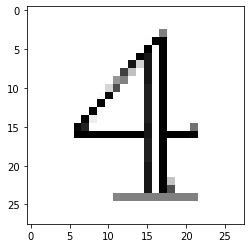

In [7]:
print(ytest[2])
plt.imshow(xtest[2],cmap='gray')

In [8]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain=xtrain/255
xtest=xtest/255
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [9]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(256, kernel_size=5, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from keras.utils import to_categorical

In [12]:
ytrain1hot=to_categorical(ytrain)
ytest1hot=to_categorical(ytest)

In [13]:
history=model.fit(xtrain,ytrain1hot,epochs=11,validation_data=(xtest,ytest1hot))

Epoch 1/11
255/255 [==============================] - 184s 715ms/step - loss: 1.1016 - accuracy: 0.6188 - val_loss: 0.1293 - val_accuracy: 0.9622
Epoch 2/11
255/255 [==============================] - 191s 749ms/step - loss: 0.1092 - accuracy: 0.9644 - val_loss: 0.0740 - val_accuracy: 0.9789
Epoch 3/11
255/255 [==============================] - 177s 696ms/step - loss: 0.0724 - accuracy: 0.9795 - val_loss: 0.0437 - val_accuracy: 0.9912
Epoch 4/11
255/255 [==============================] - 177s 696ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0536 - val_accuracy: 0.9892
Epoch 5/11
255/255 [==============================] - 176s 692ms/step - loss: 0.0412 - accuracy: 0.9888 - val_loss: 0.0581 - val_accuracy: 0.9882
Epoch 6/11
255/255 [==============================] - 172s 676ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0438 - val_accuracy: 0.9897
Epoch 7/11
255/255 [==============================] - 177s 694ms/step - loss: 0.0340 - accuracy: 0.9905 - val_loss: 0.0475 -

In [16]:
model.evaluate(xtest,ytest1hot)

64/64 [==============================] - 7s 102ms/step - loss: 0.0523 - accuracy: 0.9892


[0.052299823611974716, 0.9891998171806335]

In [17]:
model.save('CNNModel.h5')